**Handwritten Digit Recognition with FCN, CNN & Random Forest**

---
This project demonstrates and compares three different approaches for classifying handwritten digits from the MNIST dataset:



1.   A Fully‑Connected Neural Network (FCN) built in TensorFlow/Keras for baseline performance.
2.   A Convolutional Neural Network (CNN) in TensorFlow/Keras to leverage spatial feature learning.
3.   A Random Forest classifier implemented in scikit‑learn to showcase a classical machine‑learning alternative.





In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import  Dense,Dropout,Conv2D,Flatten,MaxPool2D,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filters

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_csv("/content/sample_data/mnist_train_small.csv")
testdata=pd.read_csv("/content/sample_data/mnist_test.csv")

Data Preproceessing

In [ ]:
X=np.array((data.iloc[:,1:])/255.0)
Y=np.array(data.iloc[:,0])
X_test=np.array((testdata.iloc[:,1:])/255.0)
Y_test=np.array(testdata.iloc[:,0])

In [ ]:
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(19999, 784)
(19999,)
(9999, 784)
(9999,)


Fully Connected Neural Network

In [ ]:
earlystop_nn=EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)
checkpoint_nn = ModelCheckpoint(
    'best_nn_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
model=Sequential([
    Dense(128,activation="relu"),

    Dense(64,activation="relu"),

    Dense(10,activation="linear")]
)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["sparse_categorical_accuracy","accuracy"]
)
history=model.fit(X,Y,epochs=100,batch_size=32,callbacks=[checkpoint_nn,earlystop_nn],validation_split=.1)


Epoch 1/100
552/563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7987 - loss: 0.6985 - sparse_categorical_accuracy: 0.7987
Epoch 1: val_loss improved from inf to 0.24851, saving model to best_nn_model.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8005 - loss: 0.6922 - sparse_categorical_accuracy: 0.8005 - val_accuracy: 0.9335 - val_loss: 0.2485 - val_sparse_categorical_accuracy: 0.9335
Epoch 2/100
553/563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9493 - loss: 0.1788 - sparse_categorical_accuracy: 0.9493
Epoch 2: val_loss improved from 0.24851 to 0.18566, saving model to best_nn_model.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9493 - loss: 0.1787 - sparse_categorical_accuracy: 0.9493 - val_accuracy: 0.9500 - val_loss: 0.1857 - val_sparse_categorical_accuracy: 0.9500
Epoch 3/100
551/563 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9681 - loss: 0.1130 - sparse_categorical_accuracy: 0.9681
Epoch 3: val_loss improved from 0.18566 to 0.16966, saving 

In [ ]:
prepredict=model.predict(X_test)
predict=tf.nn.softmax(prepredict)
print(model.evaluate(X_test,Y_test))
loss, accuracy,v = model.evaluate(X_test, Y_test)
print("Test accuracy:", accuracy)
print("Loss:", loss)
print(model.summary())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9600 - loss: 0.1492 - sparse_categorical_accuracy: 0.9600
[0.12433686852455139, 0.9655965566635132, 0.9655965566635132]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9600 - loss: 0.1492 - sparse_categorical_accuracy: 0.9600
Test accuracy: 0.9655965566635132
Loss: 0.12433686852455139


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

None


In [ ]:
print("Training stopped at ", earlystop_nn.stopped_epoch," epoch")
best_epoch = np.argmin(history.history['val_loss']) + 1
print("Best epoch (lowest val_loss):", best_epoch)
best_acc_epoch = np.argmax(history.history['val_accuracy']) + 1
print("Best epoch (highest val_accuracy):", best_acc_epoch)

Training stopped at  26  epoch
Best epoch (lowest val_loss): 7
Best epoch (highest val_accuracy): 26


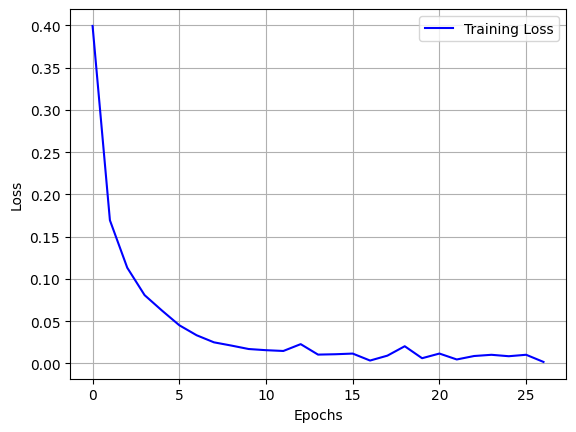

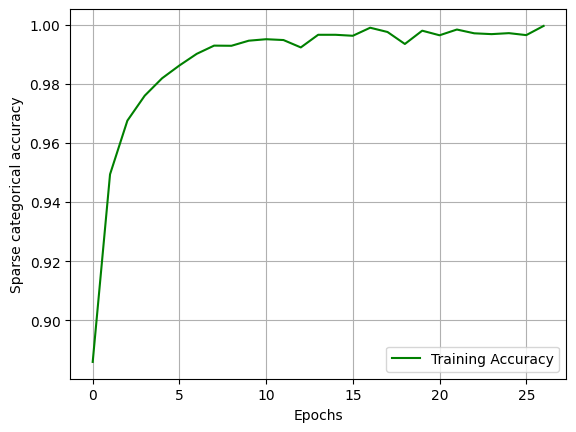

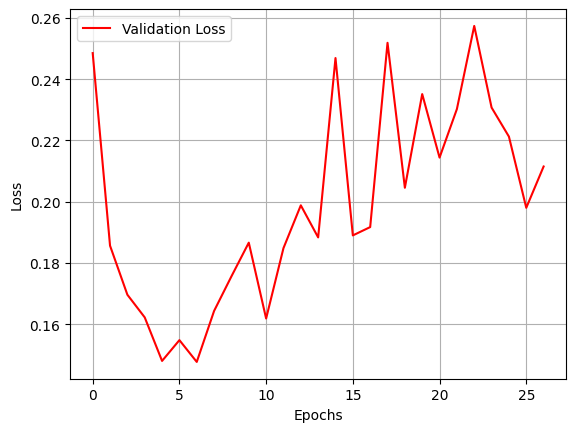

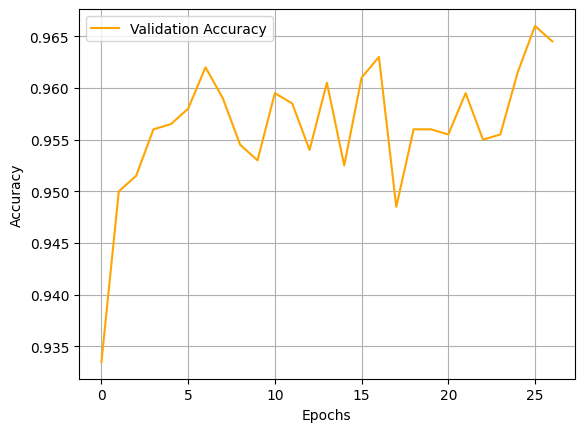

In [ ]:
plt.plot(history.history["loss"],color="blue",label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
print("\n")
plt.plot(history.history["sparse_categorical_accuracy"],color="green",label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Sparse categorical accuracy")
plt.legend()
plt.grid(True)
plt.show()
print("\n")
plt.plot(history.history["val_loss"],color="red",label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
print("\n")
plt.plot(history.history["val_accuracy"], color="orange", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Convolutional Neural Network

In [ ]:
X_cnn=X.reshape(-1,28,28,1)

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_cnn,Y,test_size=.1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(17999, 28, 28, 1)
(17999,)
(2000, 28, 28, 1)
(2000,)


In [ ]:
earlystop=EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    'best_cnn_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
cnnmodel=Sequential([
    Conv2D(filters=8,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters=16,kernel_size=(3,3),activation="relu"),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(units=256,activation="relu"),
    Dense(units=256,activation="relu"),
    Dropout(0.5),
    Dense(units=10,activation="softmax")])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnnmodel.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history_cnn=cnnmodel.fit(X_train,y_train,epochs=100,batch_size=32,callbacks=[earlystop,checkpoint],validation_data=(X_val,y_val))

Epoch 1/100
560/563 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6491 - loss: 1.0312
Epoch 1: val_loss improved from inf to 0.15364, saving model to best_cnn_model.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.6503 - loss: 1.0280 - val_accuracy: 0.9520 - val_loss: 0.1536
Epoch 2/100
561/563 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9295 - loss: 0.2206
Epoch 2: val_loss improved from 0.15364 to 0.12138, saving model to best_cnn_model.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9295 - loss: 0.2205 - val_accuracy: 0.9620 - val_loss: 0.1214
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9501 - loss: 0.1591
Epoch 3: val_loss improved from 0.12138 to 0.08249, saving model to best_cnn_model.keras
563/563 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9501 - loss: 0.1591 - val_accuracy: 0.9740 - val_loss: 0.0825
Epoch 4/100
561/563 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9575 - loss: 0.1340
Epoch 4: val_loss improved fr

In [ ]:
print("Training stopped at ", earlystop.stopped_epoch," epoch")
best_epoch = np.argmin(history_cnn.history['val_loss']) + 1
print("Best epoch (lowest val_loss):", best_epoch)
best_acc_epoch = np.argmax(history_cnn.history['val_accuracy']) + 1
print("Best epoch (highest val_accuracy):", best_acc_epoch)


Training stopped at  35  epoch
Best epoch (lowest val_loss): 16
Best epoch (highest val_accuracy): 32


In [ ]:
X_testcnn=X_test.reshape(-1,28,28,1)
print(cnnmodel.evaluate(X_testcnn,Y_test))
loss, accuracy = cnnmodel.evaluate(X_testcnn, Y_test)
print("Test accuracy:", accuracy)
print("Loss:", loss)
print(cnnmodel.summary())

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9849 - loss: 0.0520
[0.041750408709049225, 0.9873987436294556]
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0520
Test accuracy: 0.9873987436294556
Loss: 0.041750408709049225


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       102,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 516,800 (1.97 MB)

 Trainable params: 172,266 (672.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 344,534 (1.31 MB)

None


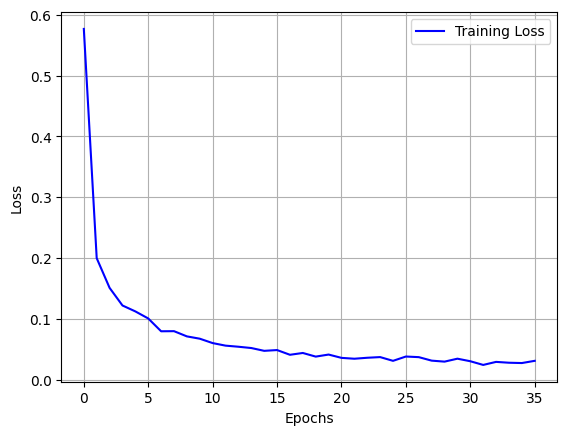

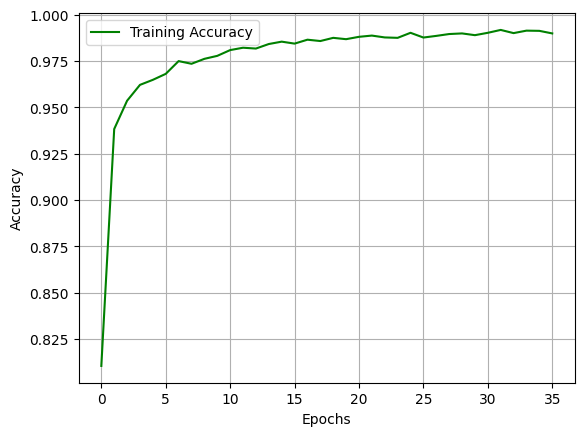

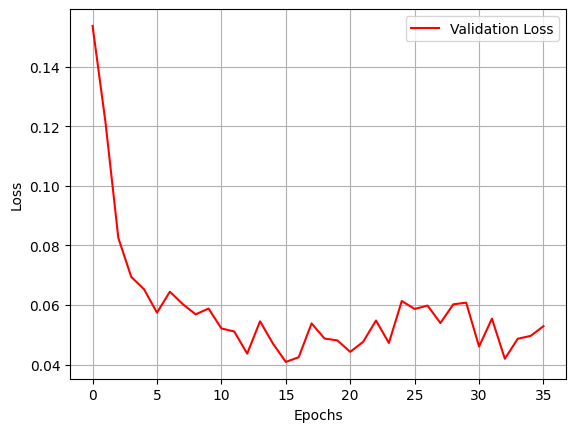

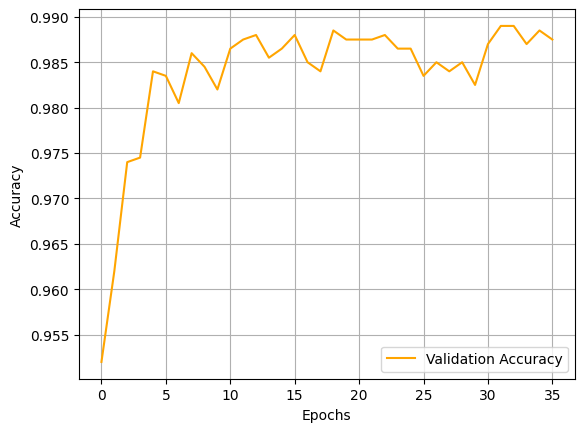

In [ ]:
plt.plot(history_cnn.history["loss"],color="blue",label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
print("\n")
plt.plot(history_cnn.history["accuracy"],color="green",label="Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
print("\n")
plt.plot(history_cnn.history["val_loss"],color="red",label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
print("\n")
plt.plot(history_cnn.history["val_accuracy"], color="orange", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


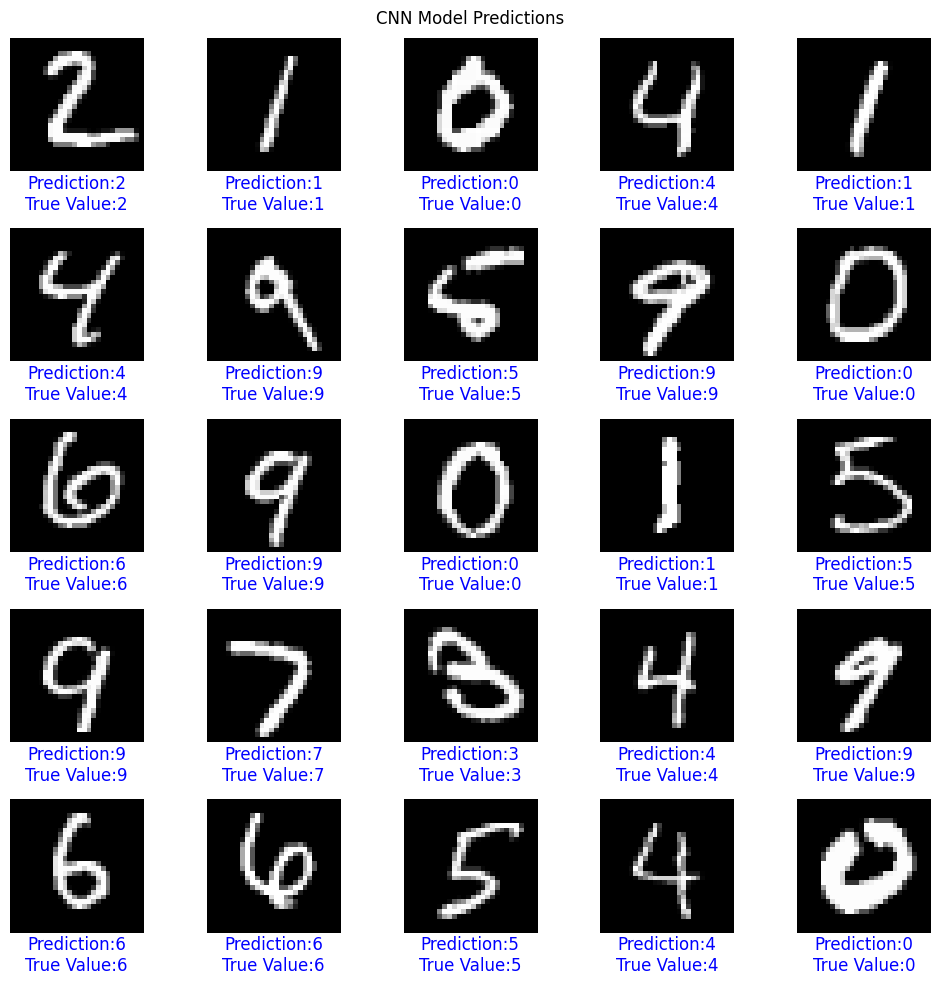

In [ ]:
f=plt.figure(figsize=(10,10))
f.suptitle("CNN Model Predictions")
for i in range(5*5):
  f.add_subplot(5,5,i+1)
  plt.imshow(X_test[i].reshape(28,28),cmap="gray")
  plt.axis("off")
  im=X_test[i].reshape(1,28,28,1)
  predict=np.argmax(cnnmodel.predict(im))
  plt.title(f"Prediction:{predict}\nTrue Value:{Y_test[i]}",y=-0.35,color="blue")
f.tight_layout()

f.show()


In [ ]:
best_model = load_model('best_cnn_model.keras')

Random Forest

In [ ]:
rfmodel=RandomForestClassifier(n_estimators=100,random_state=42)
rfmodel.fit(X,Y)

RandomForestClassifier(random_state=42)

Accuracy score: 0.9603960396039604
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.94      0.96      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.95      0.95       892
           6       0.96      0.97      0.97       958
           7       0.97      0.94      0.96      1027
           8       0.96      0.95      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96      9999
   macro avg       0.96      0.96      0.96      9999
weighted avg       0.96      0.96      0.96      9999



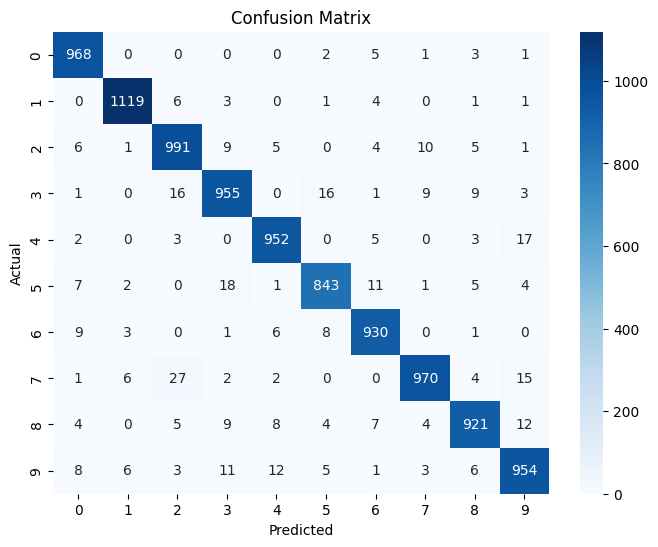

In [ ]:
y_pred=rfmodel.predict(X_test)
print("Accuracy score:",accuracy_score(Y_test,y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
!pip freeze > requirements.txt
